# game score
- positive 2 credits
- negative 1 credits
- score: (2*# of positive reviews - 1*# of negative reviews)/total# *10   (range: 0-10)

In [58]:
import pandas as pd

In [59]:
path="E:/Steam Reviews Analysis/Mid-term Submission/BIA-660 Project Data Subset.csv"
df=pd.read_csv(path)
len(df)

5442

In [21]:
df.head()

,user_name,user_product,helpful,funny,post_date,recommend_or_not,game_time,review
0,facciola007,304,4,0,2016/09/15,Recommended,235.2,amaze happy seem good far alpha release pre da...
1,Dixie Normous,257,2,0,2016/09/15,Recommended,156.3,enjoy i've play far graphically look great bar...
2,InquisitorTea,364,31,1,2016/09/15,Recommended,8.5,run well early access original sin good every ...
3,Longmire,115,2,0,2016/09/15,Recommended,16.6,play hour far seem like great road far multipl...
4,Fanest,0,6,2,2016/09/15,Recommended,212.8,play arena pvp tell source point op option pla...


## score

In [22]:
df_pos=pd.DataFrame()
df_neg=pd.DataFrame()
df_pos=df[df["recommend_or_not"]=="Recommended"]
df_neg=df[df["recommend_or_not"]=="Not Recommended"]
num_pos=len(df_pos)
num_neg=len(df_neg)
num_total=len(df)
score=(2*num_pos-1*num_neg)/(num_total*2)*10
score

7.378721058434399

## add a new column for identifying month-based reviews

In [23]:
df['ym']=0
#df['ym']=Series(np.random.randn(num_total), index=df1.index)
for i in range(num_total):
    df.loc[i,"ym"]= df["post_date"][i][0:7]
#question
#dataframe create a new column
#http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
len(df)
len(df_pos)

4491

### ym means year and month, ymd means year, month, day

In [40]:
import matplotlib.pyplot as plt
ym=['2016/09','2016/10','2016/11','2016/12','2017/01','2017/02','2017/03','2017/04','2017/05','2017/06','2017/07','2017/08','2017/09',\
   '2017/10','2017/11','2017/12','2018/01','2018/02','2018/03','2018/04','2018/05','2018/06','2018/07','2018/08','2018/09',\
   '2018/10','2018/11','2018/12']
#ymd=[]
#from datetime import date, datetime, timedelta

#def perdelta(start, end, delta):
#    curr = start
#    while curr < end:
#        yield curr
#        curr += delta

#for result in perdelta(date(2011, 10, 10), date(2011, 12, 12), timedelta(days=4)):
#    ymd.append(result.strftime('%Y-%m-%d'))

'2016-09-15'

In [24]:
df_time=[]
df_time_pos=[]
df_time_neg=[]
num_reviews=[]
num_reviews_pos=[]
num_reviews_neg=[]
for a in ym:
    # store the dataframe every month into a list. df_time[0] means the dataframe on 15/09/2016
    df_time.append(df[df["ym"]==a])
    df_time_pos.append(df[(df["ym"]==a) & (df["recommend_or_not"]=="Recommended")])
    df_time_neg.append(df[(df["ym"]==a) & (df["recommend_or_not"]=="Not Recommended")])
time_interval=len(df_time)
for i in range(time_interval):
    num_reviews.append(len(df_time[i]))
    num_reviews_pos.append(len(df_time_pos[i]))
    num_reviews_neg.append(len(df_time_neg[i]))

In [51]:
print(len(num_reviews))
print(len(df_daily))

28
5442


195

In [74]:
for i in range(num_total):
# test...  for i in range(3):
    w=df["post_date"][i].split('/')
    q='-'.join(w)
    df.loc[i,"post_date"]= q
df.head()

,user_name,user_product,helpful,funny,post_date,recommend_or_not,game_time,review
0,facciola007,304,4,0,2016-09-15,Recommended,235.2,amaze happy seem good far alpha release pre da...
1,Dixie Normous,257,2,0,2016-09-15,Recommended,156.3,enjoy i've play far graphically look great bar...
2,InquisitorTea,364,31,1,2016-09-15,Recommended,8.5,run well early access original sin good every ...
3,Longmire,115,2,0,2016-09-15,Recommended,16.6,play hour far seem like great road far multipl...
4,Fanest,0,6,2,2016-09-15,Recommended,212.8,play arena pvp tell source point op option pla...


In [68]:
dic ={}
for i in range(num_total):
    date = df.iloc[i]["post_date"]
    if date not in dic:
        dic[date] =1
    else:
        dic[date]+=1
print(len(dic))

680


In [79]:
ds=[]
y=[]
for name in dic.keys():
    ds.append(name)
for num in dic.values():
    y.append(num)

In [85]:
df_daily=pd.DataFrame()
df_daily["ds"]=ds
df_daily["y"]=y
df_daily.head()

,ds,y
0,2016-09-15,40
1,2016-09-16,28
2,2016-09-17,17
3,2016-09-18,17
4,2016-09-19,16


## barchar(daily)

Text(0,0.5,'number of reviews')

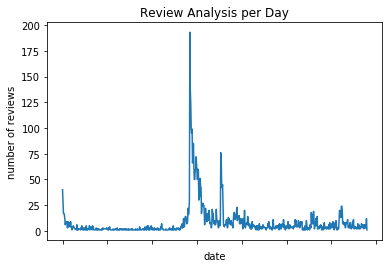

In [89]:
df_daily.set_index('ds').y.plot()
plt.title("Review Analysis per Day")
plt.xlabel("date")
plt.ylabel("number of reviews")

In [91]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_daily)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
K:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [97]:
future = model.make_future_dataframe(periods=30, freq = 'd')
future.tail()

,ds
705,2018-11-27
706,2018-11-28
707,2018-11-29
708,2018-11-30
709,2018-12-01


In [93]:
forecast = model.predict(future)

In [100]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
705,2018-11-27,-7.816216,-7.894241,-7.706979,-18.746406,11.362778,4.494977,4.494977,4.494977,0.0,0.0,0.0,-0.988817,-0.988817,-0.988817,5.483793,5.483793,5.483793,-3.321240
706,2018-11-28,-7.903545,-7.986447,-7.786538,-17.817644,12.101857,4.799905,4.799905,4.799905,0.0,0.0,0.0,-0.452983,-0.452983,-0.452983,5.252888,5.252888,5.252888,-3.103640
707,2018-11-29,-7.990873,-8.082486,-7.865377,-16.709261,13.738515,6.425740,6.425740,6.425740,0.0,0.0,0.0,1.474194,1.474194,1.474194,4.951546,4.951546,4.951546,-1.565133
708,2018-11-30,-8.078202,-8.177298,-7.943487,-17.585075,11.236842,4.663767,4.663767,4.663767,0.0,0.0,0.0,0.079784,0.079784,0.079784,4.583982,4.583982,4.583982,-3.414435
709,2018-12-01,-8.165530,-8.273800,-8.024944,-19.165291,10.774132,4.260930,4.260930,4.260930,0.0,0.0,0.0,0.104772,0.104772,0.104772,4.156159,4.156159,4.156159,-3.904600


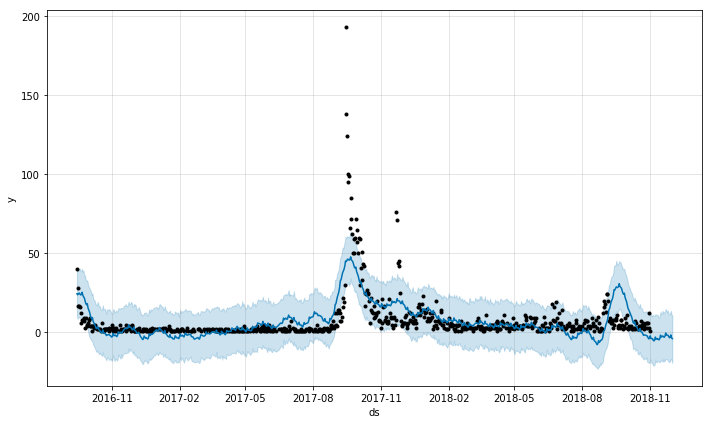

In [95]:
model.plot(forecast);

In [75]:
#test the format transmission
# df_daily=pd.DataFrame()
# for i in range(num_total):
# # test...  for i in range(3):
#     w=df["post_date"][0].split('/')
#     q='-'.join(w)
#     df_daily.loc[i,"ds"]= q
# df_daily.head()

## barchart (month)

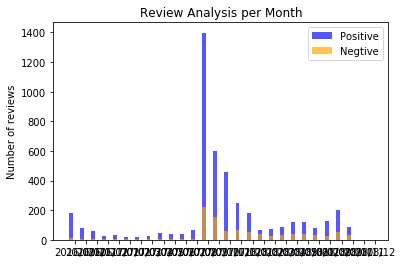

In [14]:
group= len(num_reviews)

index = np.arange(group)#通过下标index统计排列
width = 0.35
s1 = plt.bar(index,num_reviews_pos , width, alpha=0.66, color='blue', label='Positive')#设置柱状图的对象、宽度、透明度、颜色以及标签
s2 = plt.bar(index, num_reviews_neg, width, alpha=0.66, color='orange', label='Negtive')
plt.title("Review Analysis per Month")
plt.ylabel("Number of reviews")#设置y轴坐标
plt.xticks(index + width, ym)#设置x轴上数据的名称
plt.legend()#设置图例
plt.show()#显示

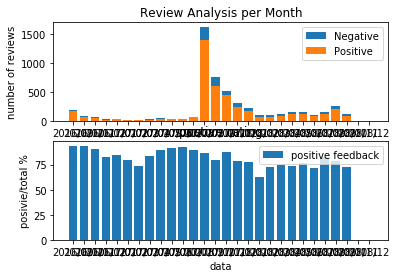

In [17]:
plt.subplot(211) 
width=1.5
s1=plt.bar(ym, num_reviews, label='Negative')
#a=plt.bar(ym, num_reviews_pos)
s2=plt.bar(ym, num_reviews_pos, label='Positive')
plt.title("Review Analysis per Month")
plt.ylabel('number of reviews')
plt.xlabel('data')
plt.legend()
#a.legend('positive')
#expand
#plt.figure(figsize = (100,20))
#plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],ym, rotation=90) #rotate

#plt.savefig("examples.jpg")

plt.subplot(212) 
s3=plt.bar(ym, num_pro, label='positive feedback')
plt.title("postive rating")
plt.ylabel('posivie/total %')
plt.xlabel('data')
plt.legend()
#for a,b in zip(x,y):
#    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

In [16]:
# positive / total
num_pro=[]
for i in range(len(num_reviews)):
    if num_reviews[i]==0:
        num_pro.append(0)
    else:
        num_pro.append(num_reviews_pos[i]/num_reviews[i]*100)
#num_pro

In [219]:
ym1=list(range(0,24))
num_reviews1=num_reviews[0:24]
x=np.mean(ym1)
y=np.mean(num_reviews)
sum_x=0
def forecast(index):
    sum_x=np.sum(list(range(index+1)))
    x_bar=sum_x/(index+1)
    
    print(x_bar)
c=forecast(24)
c

12.0


In [18]:
import numpy as np
#y=a+b*x
#a=y_bar-b*x_bar
#b=sum(x-x_bar)(y-y_bar) / sum(x-x_bar)*(x-x_bar)
#set ym to ym1 [1,2,....,28]
ym1=list(range(0,24))
num_reviews1=num_reviews[0:24]
x_bar=np.mean(ym1)
y_bar=np.mean(num_reviews)
sum_x=0
xy_temp=[]
x2_temp=[]
for i in range(len(ym1)):
    temp_xy=(ym1[i]-x_bar)*(num_reviews1[i]-y_bar)
    temp_x2=(ym1[i]-x_bar)*(ym1[i]-x_bar)
    xy_temp.append(temp_xy)
    x2_temp.append(temp_x2)
b=(np.sum(xy_temp))/(np.sum(x2_temp))
a=y_bar-b*x_bar

def forecast(x):
    y=a+b*x
    return y

c=forecast(20)
c

255.2910559006211

## curve fitting

In [49]:
x = np.arange(1,13,1)
y = np.array(num_reviews1)
z1 = np.polyfit(x, y, 3)#用3次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式

        3         2
-4.249 x + 106.5 x - 844 x + 2237


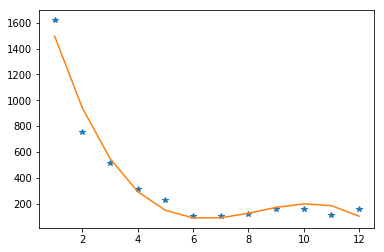

In [51]:
x = np.arange(1,13,1)
y = np.array(num_reviews1)
plt.plot(x, y,"*")
x = np.arange(1,13,1)
y = np.array(-4.249*x*x*x+106.5*x*x-844*x+2237)
plt.plot(x, y)

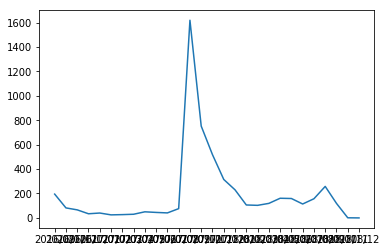

In [177]:
ym1=ym[0:25]
num_reviews1=num_reviews[0:25]
plt.plot(ym,num_reviews)

Text(0.5,1,'curve_fit')

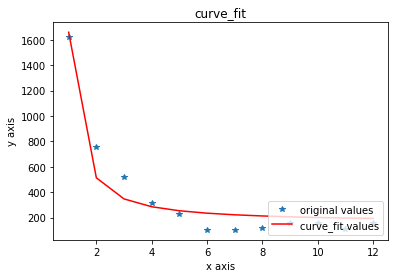

In [45]:
ym1=list(range(1,25))
num_reviews1=num_reviews[12:24]
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#用指数形式来拟合
x = np.arange(1, 13, 1)
y = np.array(num_reviews1)
def func(x,a,b):
    return a*np.exp(b/x)
popt, pcov = curve_fit(func, x, y, maxfev=5000)
a=popt[0]#popt里面是拟合系数，读者可以自己help其用法
b=popt[1]
yvals=func(x,a,b)
plot1=plt.plot(x, y, '*',label='original values')
plot2=plt.plot(x, yvals, 'r',label='curve_fit values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
plt.title('curve_fit')
#plt.show()
#plt.savefig('p2.png')